# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd

## Load the Data

In [ ]:
df = pd.read_csv('/content/clustering/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
import pandas as pd



print("Dataset Information:")
df.info()

print("\nShape of the Dataset:")
print(df.shape)


print("\nFirst Few Rows of the Dataset:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nNumber of Duplicated Rows:")
print(df.duplicated().sum())


print("\nNull Values in Each Column:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np



imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df = df[(z_scores < 3).all(axis=1)]


scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df)


df_pca = pd.DataFrame(df_pca)


print(df_pca.head())

<ipython-input-5-fe5392db01c1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


        0         1         2         3         4         5         6    \
0 -0.672518  3.702203 -0.359219 -1.498672  0.372276 -1.090684 -0.045816   
1 -2.376165 -0.873813  0.107431  0.237580 -0.204089  0.010948  0.343831   
2  1.168578 -0.475092 -3.291958  2.497592  1.182574 -1.621452  2.112158   
3  0.622826 -2.430605  0.595025 -0.180706 -0.990123  0.061063 -1.449983   
4  0.479262 -1.128859  0.161093 -0.155747 -1.198031  1.054933 -0.004135   

        7         8         9    ...       194       195       196       197  \
0 -0.908443  0.197018 -0.012509  ...  0.001908 -0.051307  0.036523 -0.062205   
1  1.503162 -0.807818 -0.042624  ... -0.002057 -0.002098  0.000708  0.000579   
2  0.449381  3.067550  3.890826  ...  0.005464  0.066955  0.315427  0.002069   
3 -0.834258  0.854519  1.371132  ... -0.001763 -0.003760 -0.001416 -0.005141   
4  0.172788 -1.321333  0.984827  ... -0.003470 -0.002632 -0.000851 -0.003944   

        198       199       200       201       202       203  
0 -0

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


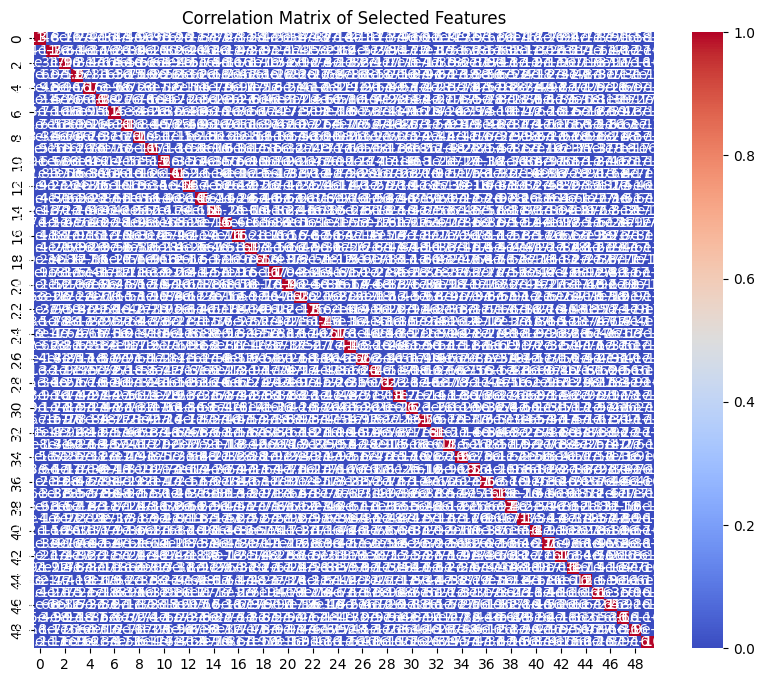

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

selector = VarianceThreshold(threshold=0.01)
df_reduced_variance = selector.fit_transform(df_pca)


df_reduced_variance = pd.DataFrame(df_reduced_variance)


corr_matrix = df_reduced_variance.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]


df_final_features = df_reduced_variance.drop(to_drop, axis=1)


plt.figure(figsize=(10, 8))
sns.heatmap(df_final_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()



## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

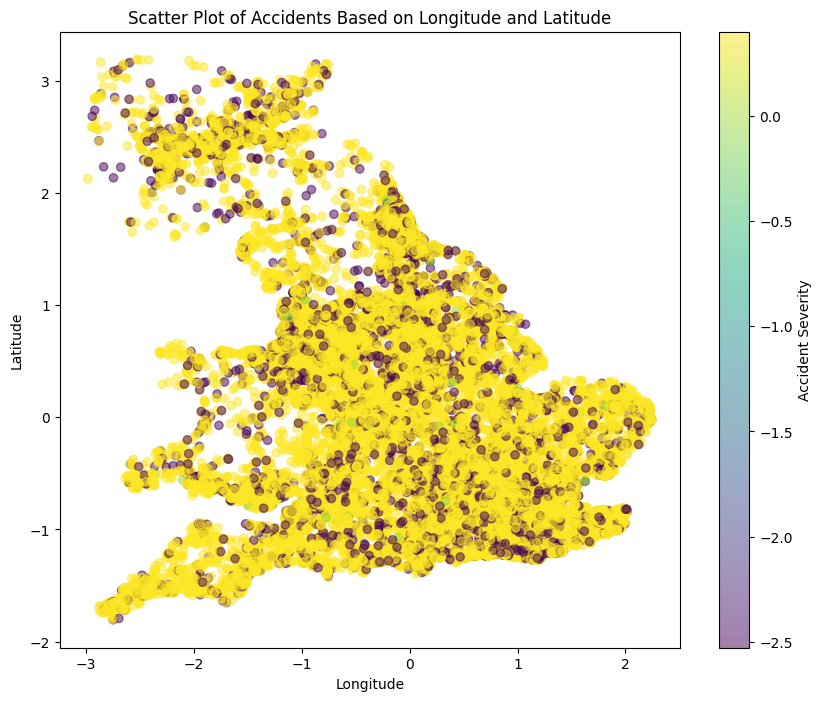

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c=df['Accident_Severity'], cmap='viridis', marker='o')


plt.colorbar(label='Accident Severity')
plt.title('Scatter Plot of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

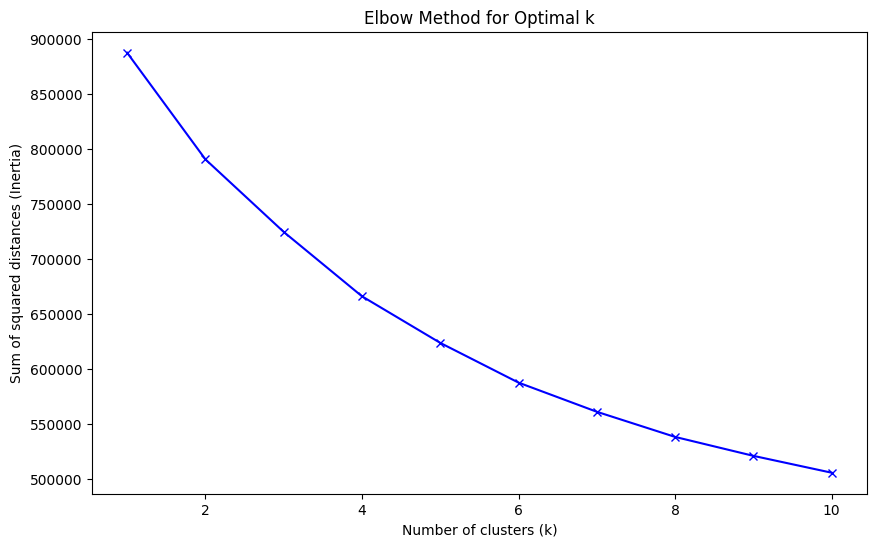

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


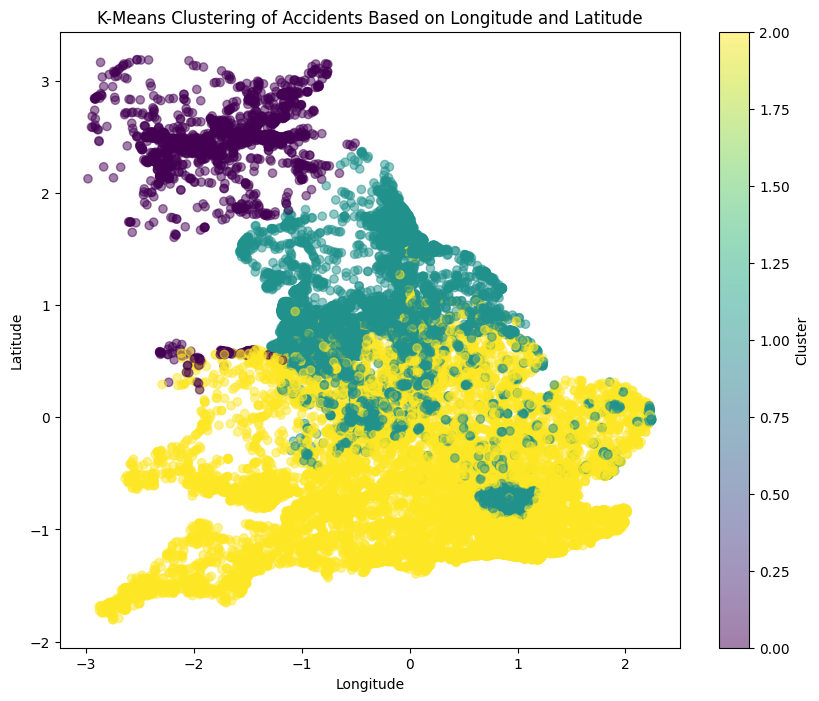

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final_features)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()



optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_final_features)


plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.


Silhouette Score: 0.12
Inertia: 724384.46


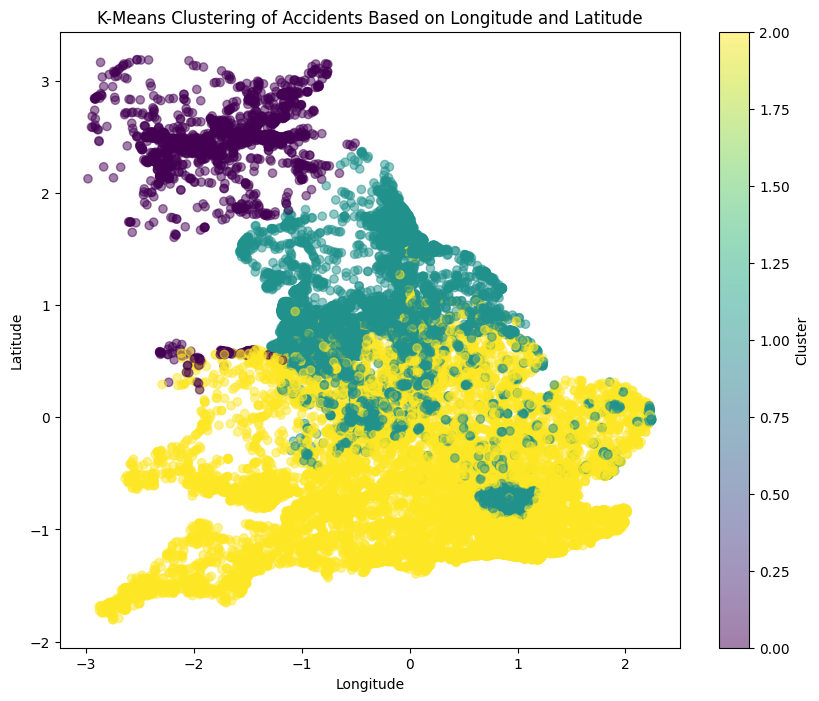

In [ ]:
from sklearn.metrics import silhouette_score


sil_score = silhouette_score(df_final_features, df['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')


inertia = kmeans.inertia_
print(f'Inertia: {inertia:.2f}')


plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Plot the data points with their predicted cluster center

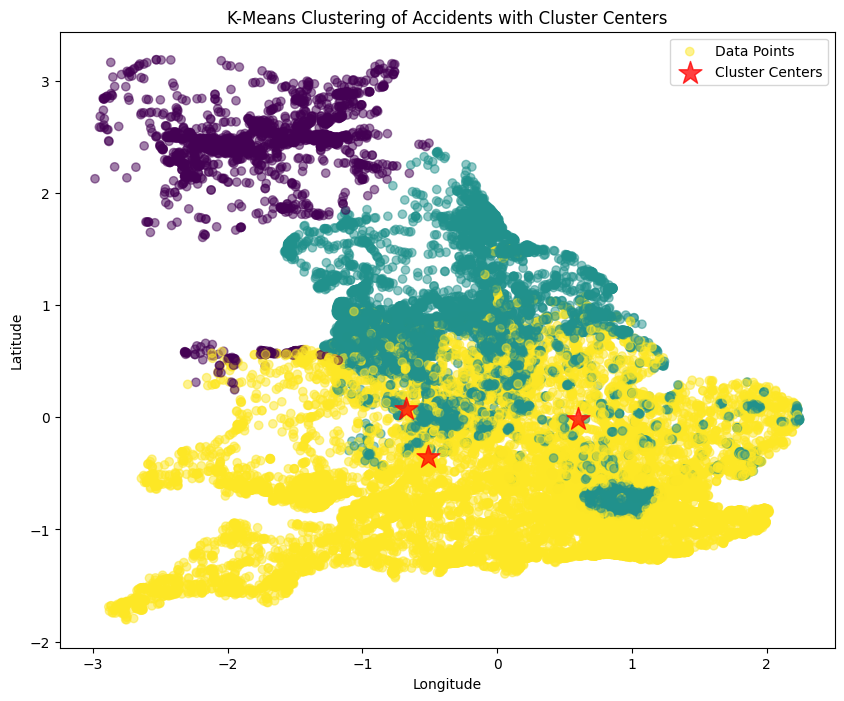

In [ ]:

plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5, label='Data Points')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, df.columns.get_loc('Longitude')], centers[:, df.columns.get_loc('Latitude')],
            c='red', s=300, alpha=0.75, marker='*', label='Cluster Centers')


plt.title('K-Means Clustering of Accidents with Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

In [ ]:
#Which features did you choose for clustering and why?
# PCA

In [ ]:
#How did you determine the optimal number?

In [ ]:
# using the Elbow Meth

In [ ]:
#Which metrics did you use to evaluate the clustering results, and why?

In [ ]:
	#Silhouette Score
	#Inertia

In [ ]:
#How do these metrics help in understanding the effectiveness of your clustering approach?

In [ ]:
#"These metrics help in understanding the effectiveness of the clustering approach."

In [ ]:
#Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

In [ ]:
#